#**<big><big>Proyecto Final - Clustering</big></big>**

* Daniel Valencia
* Luis Fernando Botero
* Sebastián López

**¡Importante!: Se debe subir el archivo .csv con los datos de los municipios antes de ejecutar**

In [2]:
from google.colab import files
files.upload()

Saving Promedios_Climatologicos_1981-2010.csv to Promedios_Climatologicos_1981-2010.csv


{'Promedios_Climatologicos_1981-2010.csv': b'CODIGO,CAT,NOMBRE,MUNICIPIO,DEPARTAMENTO,LONGITUD,LATITUD,ELEVACION,TEMP ENE,TEMP FEB,TEMP MAR,TEMP ABR,TEMP MAY,TEMP JUN,TEMP JUL,TEMP AGO,TEMP SEP,TEMP OCT,TEMP NOV,TEMP DIC,PROMEDIO TEMP,LLUVIA ENE,LLUVIA FEB,LLUVIA MAR,LLUVIA ABR,LLUVIA MAY,LLUVIA JUN,LLUVIA JUL,LLUVIA AGO,LLUVIA SEP,LLUVIA OCT,LLUVIA NOV,LLUVIA DIC,PROMEDIO LLUVIA\r\n16055040,CP,Abrego Centro Admo,Abrego,Norte de Santander,-73.22305556,8.087222222,1430,20.1,20.5,21,21.2,21.3,21.3,21.3,21.3,21,20.9,20.7,20.3,20.9,9.5,19.1,28.9,110.7,170.1,96,87.4,144.7,210.1,165.8,76.9,23.6,95.23333333\r\n21045010,CO,Betulia La,Agrado,Huila,-75.70508333,2.281583333,780,24.5,24.5,24.2,24.1,24.1,23.8,23.7,24.3,24.8,24.8,24.2,24.2,24.3,89,111.5,119.2,97.4,90.2,54.6,45,27.5,44,133.4,137.9,120.2,89.15833333\r\n23215030,CO,Aguas Claras,Aguachica,Cesar,-73.60277778,8.228888889,208,29.2,29.8,29.7,28.8,28.3,28.1,28.3,28.3,27.9,27.5,27.8,28.2,28.5,16.9,33,49.7,145.7,190.5,153,124.8,161.9,189.7,161

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Lectura y Gráfica de los Datos Climáticos y Geográficos**

El archivo CSV subido a este cuaderno, contiene información de los promedios climatológicos de distintas localidades en varios municipios en Colombia desde el año 1981 hasta 2010. Los datos que se consideraron para este proyecto fueron la precipitación (mm) y la temperatura (ºC) para los doce meses del año.

Estos datos son proporcionados por el IDEAM (Instituto de Hidrología, Meteorología y Estudios Ambientales). 

In [4]:
df = pd.read_csv('Promedios_Climatologicos_1981-2010.csv')
df.head()

,CODIGO,CAT,NOMBRE,MUNICIPIO,DEPARTAMENTO,LONGITUD,LATITUD,ELEVACION,TEMP ENE,TEMP FEB,...,LLUVIA ABR,LLUVIA MAY,LLUVIA JUN,LLUVIA JUL,LLUVIA AGO,LLUVIA SEP,LLUVIA OCT,LLUVIA NOV,LLUVIA DIC,PROMEDIO LLUVIA
0,16055040,CP,Abrego Centro Admo,Abrego,Norte de Santander,-73.223056,8.087222,1430,20.1,20.5,...,110.7,170.1,96.0,87.4,144.7,210.1,165.8,76.9,23.6,95.233333
1,21045010,CO,Betulia La,Agrado,Huila,-75.705083,2.281583,780,24.5,24.5,...,97.4,90.2,54.6,45.0,27.5,44.0,133.4,137.9,120.2,89.158333
2,23215030,CO,Aguas Claras,Aguachica,Cesar,-73.602778,8.228889,208,29.2,29.8,...,145.7,190.5,153.0,124.8,161.9,189.7,161.6,104.1,48.2,114.925000
3,26185010,CO,Pelada La,Aguadas,Caldas,-75.344778,5.578750,2180,16.7,17.0,...,195.7,240.0,181.0,164.6,135.5,189.6,212.8,195.8,121.5,168.275000
4,35195030,CO,Aguazul,Aguazul,Casanare,-72.550889,5.179333,380,27.9,28.1,...,279.0,414.2,414.3,365.7,317.2,315.5,274.7,144.1,36.8,228.241667


A continuación se aprecia el mapa de Colombia teniendo en cuenta las coordenadas de latitud y longitud proporcionadas por la base de datos.

<function matplotlib.pyplot.legend>

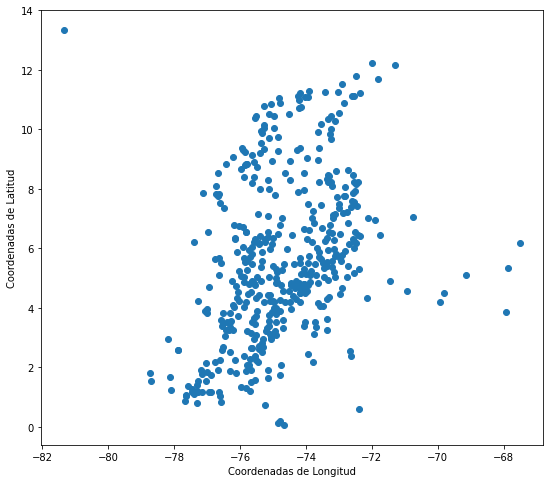

In [5]:
plt.rcParams["figure.figsize"] = (9,8)
plt.scatter(df['LONGITUD'], df['LATITUD'])
plt.xlabel('Coordenadas de Longitud')
plt.ylabel('Coordenadas de Latitud')
plt.legend

También se puede ver una representación gráfica del promedio de temperatura  con relación al promedio de precipitación.

<function matplotlib.pyplot.legend>

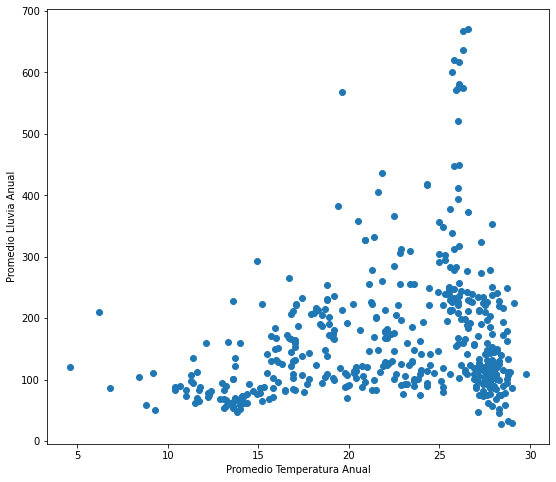

In [6]:
plt.scatter(df['PROMEDIO TEMP'], df['PROMEDIO LLUVIA'])
plt.xlabel('Promedio Temperatura Anual')
plt.ylabel('Promedio Lluvia Anual')
plt.legend

# **Método del Codo**

Se determina la cantidad de centroids apropiada para implementar el algoritmo k-means. Para este cálculo se tienen en cuenta las 24 variables del promedio de la temperatura y lluvia de cada mes.

In [7]:
k_iterations = 10
sum_square_error = []

for k in range(1, k_iterations):
  km = KMeans(n_clusters=k)
  km.fit(df[['TEMP ENE', 'TEMP FEB', 'TEMP MAR', 'TEMP ABR', 'TEMP MAY', 'TEMP JUN', 'TEMP JUL', 'TEMP AGO', 'TEMP SEP', 'TEMP OCT', 'TEMP NOV', 'TEMP DIC', 
                                 'LLUVIA ENE', 'LLUVIA FEB', 'LLUVIA MAR', 'LLUVIA ABR', 'LLUVIA MAY', 'LLUVIA JUN', 'LLUVIA JUL', 'LLUVIA AGO', 'LLUVIA SEP', 'LLUVIA OCT', 'LLUVIA NOV', 'LLUVIA DIC']])
  sum_square_error.append(km.inertia_)

sum_square_error

[82476946.41468886,
 42860780.22314171,
 26209379.41301056,
 21788424.774410784,
 18266948.451010786,
 15975100.413008027,
 14273705.681050517,
 13479386.087690372,
 12645531.506381793]

El codo se ubica cuando los $k$ clusters es 3, por lo que este será el número de clusters con el que se hará el cálculo.

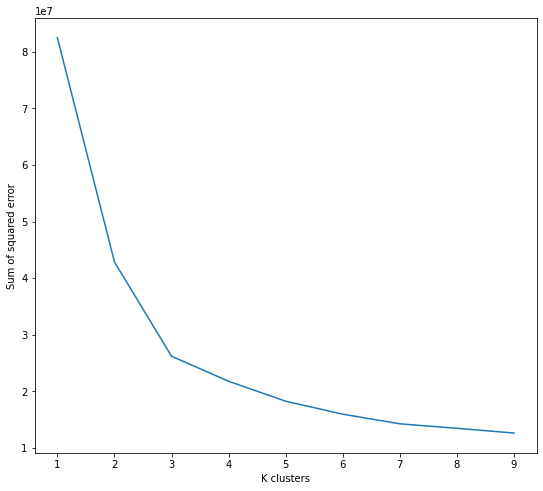

In [8]:
plt.xlabel('K clusters')
plt.ylabel('Sum of squared error')
plt.plot(range(1,k_iterations), sum_square_error)

# **Definición de Clusters**

Se calculan los clusters, coordenadas de los centroides y se tabulan los datos con la nueva columna que indica el cluster al que pertenece cada localidad.

In [9]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

y_predicted = km.fit_predict(df[['TEMP ENE', 'TEMP FEB', 'TEMP MAR', 'TEMP ABR', 'TEMP MAY', 'TEMP JUN', 'TEMP JUL', 'TEMP AGO', 'TEMP SEP', 'TEMP OCT', 'TEMP NOV', 'TEMP DIC', 
                                 'LLUVIA ENE', 'LLUVIA FEB', 'LLUVIA MAR', 'LLUVIA ABR', 'LLUVIA MAY', 'LLUVIA JUN', 'LLUVIA JUL', 'LLUVIA AGO', 'LLUVIA SEP', 'LLUVIA OCT', 'LLUVIA NOV', 'LLUVIA DIC']])

Los centroides están ubicados en el espacio de 24 dimensiones. A continuación se encuentra información sobre estos en las distintas variables de temperatura y lluvia.

In [10]:
labels = ['TEMP ENE', 'TEMP FEB', 'TEMP MAR', 'TEMP ABR', 'TEMP MAY', 'TEMP JUN', 'TEMP JUL', 'TEMP AGO', 'TEMP SEP', 'TEMP OCT', 'TEMP NOV', 'TEMP DIC', 
          'LLUVIA ENE', 'LLUVIA FEB', 'LLUVIA MAR', 'LLUVIA ABR', 'LLUVIA MAY', 'LLUVIA JUN', 'LLUVIA JUL', 'LLUVIA AGO', 'LLUVIA SEP', 'LLUVIA OCT', 'LLUVIA NOV', 'LLUVIA DIC']

pd.DataFrame({'Label':labels,'Cluster 0' : km.cluster_centers_[0], 'Cluster 1': km.cluster_centers_[1], 'Cluster 2': km.cluster_centers_[2]})

,Label,Cluster 0,Cluster 1,Cluster 2
0,TEMP ENE,23.945390,21.221107,25.010
1,TEMP FEB,24.149645,21.459862,25.240
2,TEMP MAR,24.099291,21.553287,25.345
3,TEMP ABR,23.822695,21.521799,25.390
4,TEMP MAY,23.649645,21.465398,25.360
5,TEMP JUN,23.414184,21.414533,25.165
6,TEMP JUL,23.305674,21.390311,25.130
7,TEMP AGO,23.521986,21.560208,25.165
8,TEMP SEP,23.580851,21.419723,25.060
9,TEMP OCT,23.528369,21.129758,24.950


Tabla de cada una de las localidades con su temperatura, lluvia promedio y cluster asignado.

In [11]:
df['CLUSTER'] = y_predicted

nombres = []
municipios = []
departamentos = []
promedio_temp = []
promedio_lluvia = []
cluster = []

for index, row in df.iterrows():
    nombres.append(row['NOMBRE'])
    municipios.append(row['MUNICIPIO'])
    departamentos.append(row['DEPARTAMENTO'])
    promedio_temp.append(row['PROMEDIO TEMP'])
    promedio_lluvia.append(row['PROMEDIO LLUVIA'])
    cluster.append(row['CLUSTER'])
  
pd.DataFrame({'Nombre':nombres, 'Municipio':municipios, 'Departamento':departamentos, 'Promedio Temp':promedio_temp, 'Promedio Lluvia':promedio_lluvia, 'Cluster':cluster})

,Nombre,Municipio,Departamento,Promedio Temp,Promedio Lluvia,Cluster
0,Abrego Centro Admo,Abrego,Norte de Santander,20.9,95.233333,1
1,Betulia La,Agrado,Huila,24.3,89.158333,1
2,Aguas Claras,Aguachica,Cesar,28.5,114.925000,1
3,Pelada La,Aguadas,Caldas,16.7,168.275000,1
4,Aguazul,Aguazul,Casanare,26.7,228.241667,0
...,...,...,...,...,...,...
445,Monterrey Forestal,Zambrano,Bolivar,28.3,74.141667,1
446,Zapatoca,Zapatoca,Santander,18.7,104.675000,1
447,Ing Riopaila,Zarzal,Valle del Cauca,24.3,113.058333,1
448,Padelma,Zona Bananera,Magdalena,27.8,102.516667,1


## Gráfica de los Clusters

### En Colombia

<function matplotlib.pyplot.legend>

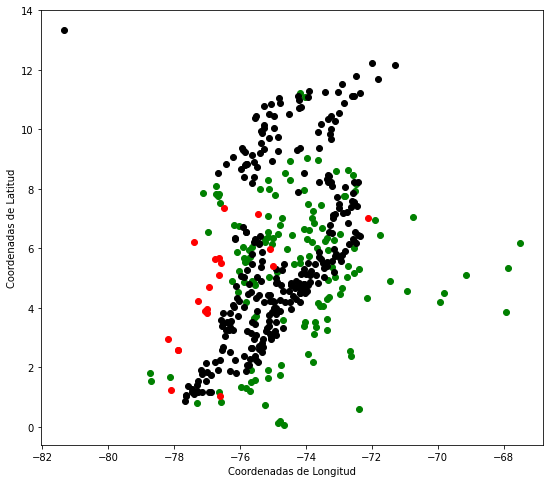

In [12]:
groups = []
colors = ['green', 'black', 'red', 'orange']

for i in range(num_clusters):
  groups.append(df[df.CLUSTER==i])

for i in range(num_clusters):
  plt.scatter(groups[i]['LONGITUD'], groups[i]['LATITUD'], color=colors[i])

plt.xlabel('Coordenadas de Longitud')
plt.ylabel('Coordenadas de Latitud')
plt.legend

### Teniendo en cuenta el promedio de lluvia en función de la temperatura promedio

<function matplotlib.pyplot.legend>

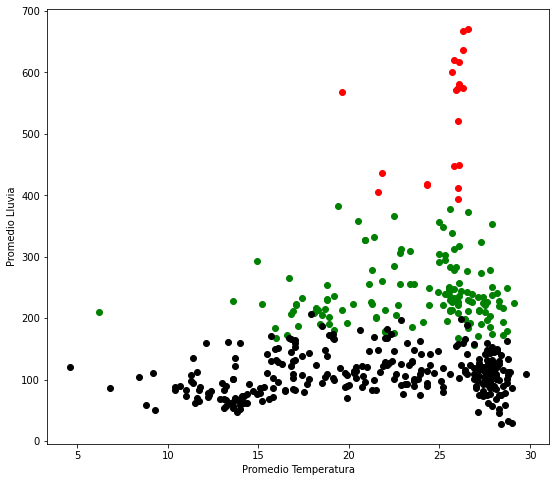

In [13]:
groups = []
colors = ['green', 'black', 'red', 'orange']

for i in range(num_clusters):
  groups.append(df[df.CLUSTER==i])

for i in range(num_clusters):
  plt.scatter(groups[i]['PROMEDIO TEMP'], groups[i]['PROMEDIO LLUVIA'], color=colors[i])

# No se pueden representar los centroids, pues están en la dimensión 24
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Promedio Temperatura')
plt.ylabel('Promedio Lluvia')
plt.legend

# Fuente

* IDEAM (Instituto de Hidrología, Meteorología y Estudios Ambientales). (2010). Tiempo y Clima. Obtenido de IDEAM: http://www.ideam.gov.co/web/tiempo-y-clima/clima

